In [1]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import e

In [2]:
def runge_kutta_solver(func,tspan,x0,*real_func):
    #func         the callable differential equation.
    #tspan        the interval of time.
    #x0           initial values.
    #real_func    optional, used to calculate the MSE
    sol=integrate.solve_ivp(func,tspan,x0)
    X=sol.y
    #getting the value array.
    X=X[-1]
    val=X[-1]
    #sol.y is a list of arrays that's why I have to read the value twice.
    #displaying the approximated value.
    T=sol.t
    #getting the time points array.
    if real_func:
        real_func=real_func[0]
        #access the callable function from the tuple.
        Y=[] #an array containing the real function values for the given time points.
        for t in T:
            y=real_func(t)
            Y.append(y)
        mse=mean_squared_error(Y,X)
        plt.plot(T,X,'r') #So the approximated values will be presented in red line, in order to distinguish it from the real function.
        plt.plot(T,Y,'b')
        plt.xlabel('time')
        plt.title('runge kutta method')
        plt.show
        print('at t=',tspan[-1],', the value of the approximated solution is',val,', the mean squared error is',mse,'.')
    else:
        plt.plot(T,X,'r')
        plt.xlabel('time')
        plt.title('runge kutta method')
        plt.show
        print('at t=',tspan[-1],', the value of the approximated solution is',val,'.')
    return sol

In [3]:
def func(t,x):
    dxdt=x
    return dxdt #defining the callable differential equation for the scipy integrate.

tspan=[0,10]
x0=[1]

def real_func(t):
    y=e**t
    return y #the actual function in this ODE is simply e^t.

at t= 10 , the value of the approximated solution is 22016.12509092571 .


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.10001999,  1.06609106,  2.30431769,  3.64528981,
        5.0274784 ,  6.42658963,  7.83271453,  9.2417576 , 10.        ])
 t_events: None
        y: array([[1.00000000e+00, 1.10519301e+00, 2.90405980e+00, 1.00174032e+01,
        3.82917453e+01, 1.52525445e+02, 6.17906340e+02, 2.52084574e+03,
        1.03142124e+04, 2.20161251e+04]])
 y_events: None

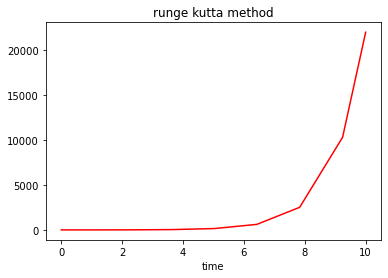

In [4]:
runge_kutta_solver(func,tspan,x0) #The first time trying optional argument, tunrs out that it worked.

at t= 10 , the value of the approximated solution is 22016.12509092571 , the mean squared error is 13.227529965976956 .


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.10001999,  1.06609106,  2.30431769,  3.64528981,
        5.0274784 ,  6.42658963,  7.83271453,  9.2417576 , 10.        ])
 t_events: None
        y: array([[1.00000000e+00, 1.10519301e+00, 2.90405980e+00, 1.00174032e+01,
        3.82917453e+01, 1.52525445e+02, 6.17906340e+02, 2.52084574e+03,
        1.03142124e+04, 2.20161251e+04]])
 y_events: None

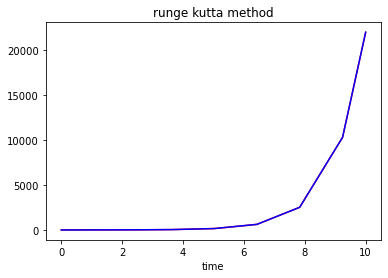

In [5]:
runge_kutta_solver(func,tspan,x0,real_func) 